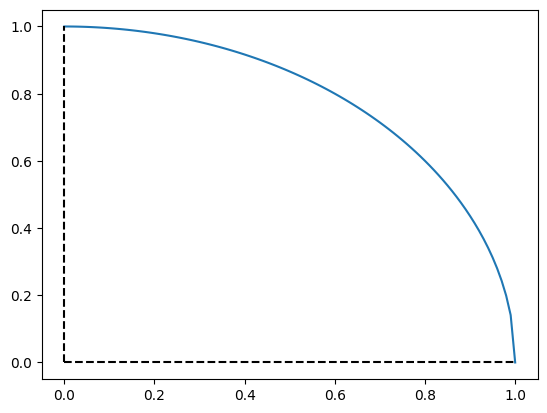

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

"""
Definindo a função que retorna a circunferência unitária e 
plotando para clareza gráfica
"""

def f(x):
    return (1 - x**2) ** 0.5


x = np.arange(0, 1 + 0.01, 0.01)

plt.plot(x, f(x))

plt.plot([0, 0], [0, 1], 'k--')

plt.plot([0, 1], [0, 0], 'k--')

In [13]:
"""
Definindo o método para cálculo da aproximação de uma
integral.
"""


def metodo_simpson_composto(f, a, b, n):

    """
    Recebe a função F que queremos integrar, o começo e o fim do intervalo
    de integração, e a quantidade de vezes a se iterar o método de simpson.
    """

    xi = np.linspace(a, b, 2 * n + 1)
    yi = f(xi)
    h = (b - a) / n
    Isimp = (
        h
        / 6
        * (
            f(xi[0])
            + f(xi[-1])
            + 2 * np.sum(f(xi[1::2]))
            + 4 * np.sum(f(xi[::2]))
        )
    )
    return Isimp


numero_de_iteracoes = 100000
erro_cometido_msc = abs(metodo_simpson_composto(f,0,1,numero_de_iteracoes) - np.pi/4)

In [14]:
#Criando um Dataframe com os números sorteados.

numero_de_sorteios = 100000
df = pd.DataFrame(np.random.rand(numero_de_sorteios, 2), columns=['X', 'Y'])

In [15]:
# Fazendo o cálculo da distância da origem. Contando quantos
# pontos cairam dentro da circunferência. Calculando a probabi-
# lidade (área) e o erro cometido da aproximação.

df['Distancia'] = (df['X'] ** 2 + df['Y'] ** 2) ** 0.5
df_distancia_maior_q_1 = df.query('Distancia <= 1')
numero_de_pontos_dentro_circunferencia = len(df_distancia_maior_q_1)
probabilidade = numero_de_pontos_dentro_circunferencia / numero_de_sorteios
erro_cometido_mtc = abs(probabilidade - (np.pi / 4))

In [16]:
# Printando resultados e fazendo um comparativo com o 
# método de simpson composto.

print(f'Área exata: {np.pi/4}\n')

print(f'Área aproximada por método de Monte Carlo: {probabilidade}\n')

print(
    f'Ao utilizar o MTC com {numero_de_sorteios} números sorteados, é obtido um erro de:\n{erro_cometido_mtc}\n'
)
print(
    f'Ao utilizar o Método de Simpson composto com {numero_de_iteracoes} iterações, é obtido um erro de:\n{erro_cometido_msc}\n'
)
print(
    f'Módulo da diferença entre os dois métodos: {abs(erro_cometido_mtc - erro_cometido_msc)}'
)

Área exata: 0.7853981633974483

Área aproximada por método de Monte Carlo: 0.78426

Ao utilizar o MTC com 100000 números sorteados, é obtido um erro de:
0.0011381633974483218

Ao utilizar o Método de Simpson composto com 100000 iterações, é obtido um erro de:
4.9947097033875565e-06

Módulo da diferença entre os dois métodos: 0.0011331686877449343


In [17]:
iteracoes_ou_sorteios = 10000

In [18]:
# Criando uma lista com o erro conforme o número de 
# números sorteados varia.

varios_sorteios = np.arange(1, iteracoes_ou_sorteios)
lista_erro_mtc = []

for numero_de_sorteios in varios_sorteios:
    df = pd.DataFrame()
    df = pd.DataFrame(
        np.random.rand(numero_de_sorteios, 2), columns=['X', 'Y']
    )
    df['Distancia'] = (df['X'] ** 2 + df['Y'] ** 2) ** 0.5
    df_distancia_maior_q_1 = df.query('Distancia <= 1')
    numero_de_pontos_dentro_circunferencia = len(df_distancia_maior_q_1)
    probabilidade = numero_de_pontos_dentro_circunferencia / numero_de_sorteios
    erro_cometido_mtc = abs(probabilidade - (np.pi / 4))
    lista_erro_mtc.append(erro_cometido_mtc)

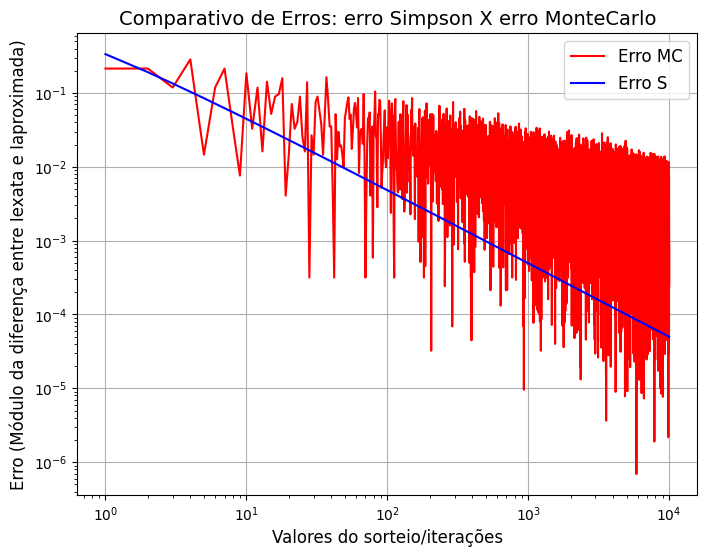

In [19]:
# Replicando o código do plot do erro de simpson, e adicionando
# a lista com os erros calculada na célula anterior

valores_de_n = np.arange(1, iteracoes_ou_sorteios)


lista_erro_ms = [
    abs(metodo_simpson_composto(f, 0, 1, n) - np.pi / 4) for n in valores_de_n
]

plt.figure(figsize=(8, 6))
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.plot(varios_sorteios, lista_erro_mtc, color='r', linestyle='-')
plt.plot(valores_de_n, lista_erro_ms, color='b', linestyle='-')

plt.xlabel('Valores do sorteio/iterações', fontsize=12)
plt.ylabel('Erro (Módulo da diferença entre Iexata e Iaproximada)', fontsize=12)
plt.title('Comparativo de Erros: erro Simpson X erro MonteCarlo', fontsize=14)
plt.legend(['Erro MC', 'Erro S'], fontsize=12)


plt.show()